In [1]:
%load_ext autoreload
%autoreload 2
from Beam_trace import *

In [2]:
def add_achromat(s,f,DISZ):
    """Add Thorlabs achromat f=focal length (needs to be one of the available)
        s=lens system, DISZ = distance after lens
    """
    if f==250:
        #f=250 achromat
        s.add_surface(surface(7.5, 7.294478080093399900E-003   ,1.5139))
        s.add_surface(surface(2, -8.953353030709999500E-003   ,1.6411))
        s.add_surface(surface(DISZ, -2.177700348432099900E-003  ,1))
    elif f==200:
       #f=200 achromat
        s.add_surface(surface(8.5,  9.102494083378799600E-003    ,1.5139))
        s.add_surface(surface(2,  -1.073998496402110000E-002  ,1.6411))
        s.add_surface(surface(DISZ,  -2.657807308970099800E-003  ,1))
    elif f==150:    
        #f=150 achromat
        s.add_surface(surface(12,1.202212070209180000E-2 ,1.514))
        s.add_surface(surface(3,-1.386577925679420000E-002 ,1.6656))
        s.add_surface(surface(DISZ,-4.037141703673800000E-003 ,1))
    elif f==100:    
        #f=100 achromat
        s.add_surface(surface(16, 1.406074240719910000E-002  ,1.665))
        s.add_surface(surface(4,-2.263980076975320000E-002  ,1.7196))
        s.add_surface(surface(DISZ, -2.754062241806699900E-003  ,1))
    elif f==80:
    #f=75 achromat
        s.add_surface(surface(16,1.821493624772310000E-002,1.665))
        s.add_surface(surface(2,-2.155172413793100100E-002,1.7945))
        s.add_surface(surface(DISZ,-4.045307443365699800E-003,1))

    elif f==75:
    #f=75 achromat
        s.add_surface(surface(20,0.0196850393700787,1.66))
        s.add_surface(surface(3,-0.0239865675221876,1.7258))
        s.add_surface(surface(DISZ,-0.0040371417036738,1))

def add_lens(s,C1,C2,d=10,DISZ=10):
        s.add_surface(surface(10,C1,1.514))
        s.add_surface(surface(DISZ,C2,1))
def add_monospheric(s,f,DISZ,reverse=False):
    tlm=thorlabs_lens_monospheric
    if reverse:
        s.add_surface(surface(tlm[f][0],0,1.514))
        s.add_surface(surface(DISZ,-tlm[f][1],1))
    else:
        s.add_surface(surface(tlm[f][0],tlm[f][1],1.514))
        s.add_surface(surface(DISZ,0,1))
def add_meniscus(s,f,DISZ,reverse=False):
    tlm=thorlabs_meniscus
    if reverse:
        s.add_surface(surface(tlm[f][0],tlm[f][2],1.514))
        s.add_surface(surface(DISZ,-tlm[f][1],1))
    else:
        s.add_surface(surface(tlm[f][0],tlm[f][1],1.514))
        s.add_surface(surface(DISZ,tlm[f][2],1))

thorlabs_lens_monospheric={
    -150:[4.0,-1.295504599041330000E-002],
    -100:[4.0,-1.943256898561989900E-002],
    -75:[3.5, -2.591344908007259900E-002],
    60:[16.29, 3.236245954692559800E-002],
    75:[12.52, 2.588661661920790100E-002],
    100:[9.69, 1.941747572815530000E-002],
    125:[8.22, 1.553277415346380000E-002],
    150:[7.29, 1.294330830960390000E-002],
    175:[6.65, 1.109508487739930100E-002],
    200:[6.18, 9.707795359673799400E-003],
    250:[5.52, 7.765783955890300100E-003],
    300:[5.1,  6.471654154801999600E-003],
    400:[4.57, 4.853662088045399900E-003],
    500:[4.25, 3.882891977945199900E-003],
    750:[3.83, 2.588594651963400000E-003],
    1000:[3.62,1.941445988972600000E-003] 
}        
   
thorlabs_meniscus={
    100:[9.7,  3.295978905735000300E-002, 1.519756838905780000E-002],
    150:[7.29, 2.088991017338629900E-002, 8.380824673147799900E-003],
    200:[6.18, 1.534683855125840000E-002, 5.827505827505800200E-003],
    250:[5.53, 1.211533801793070000E-002, 4.450972537499400100E-003],
    300:[5.1,  9.992006394884100600E-003, 3.582688449412400200E-003]
}    
      

211.448956299 58.9111081088
(211.44895629882885, 0.00035661072233494906)


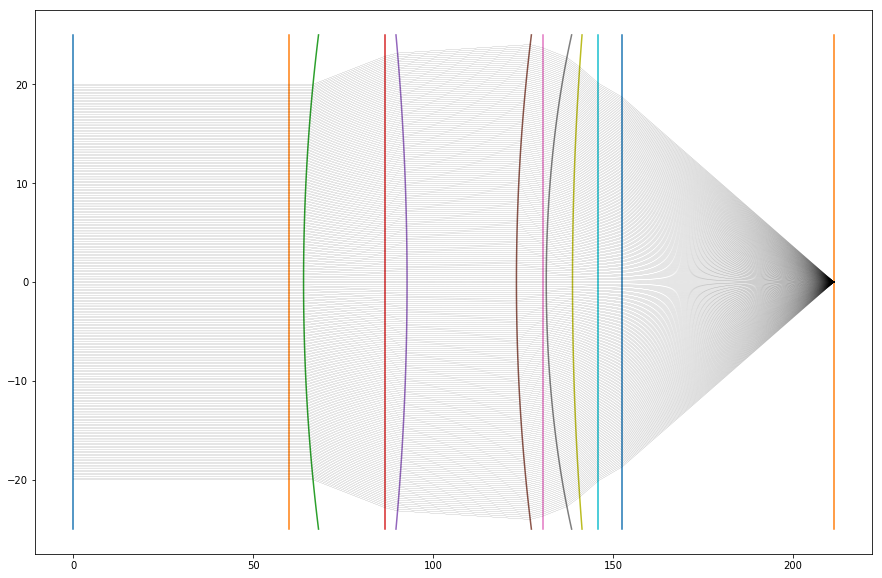

In [96]:
# Analyze infinity corrected objective part 1
#4 lens objective
s=lens_system(20)
s.surfaces=[]
s.add_surface(surface(60,0,1))

add_monospheric(s,-150,22.58199437,True)
add_monospheric(s,200,30.39585382,True)
add_monospheric(s,150,1)
add_meniscus(s,150,7.2)
s.add_surface(surface(6.6,0,1.456))
s.add_surface(surface(59,0,1))
s.add_surface(surface(100,0,1))
plt.figure(figsize=(15,10))
s.calculate_marginal()

CLC=s.circle_of_least_confusion()
focus_pos=CLC[0]
pp=focus_pos-s.surfaces[-2].pos()
print(focus_pos,pp)
s.surfaces[-2].DISZ=pp   #set end surface to focus position
s.plot()
bb=beam_field()        
bb.rectangular_grid(1,250,s.entrance_pupil,0.002*0)
bb.propagate(s.surfaces)
bb.plot(color='black')
print(CLC)
plt.show()
s.reverse()
s.surfaces.pop()
s.surfaces[-1].DISZ=200.5 #correct end surfaces
add_achromat(s,250,300)

s.add_surface(surface(10,0,1))


(609.05876159667969, 0.0056232875102395496)
[  0.00000000e+00   0.00000000e+00   0.00000000e+00  -1.30429561e-03
  -6.70593185e-02  -3.28228295e-03  -6.46976568e-02  -4.97771349e-03
  -5.44718057e-03   1.92379459e-03   1.27376423e-07  -4.52050695e-01
   3.88304093e-01  -2.35884104e-02  -0.00000000e+00] -0.232179538204


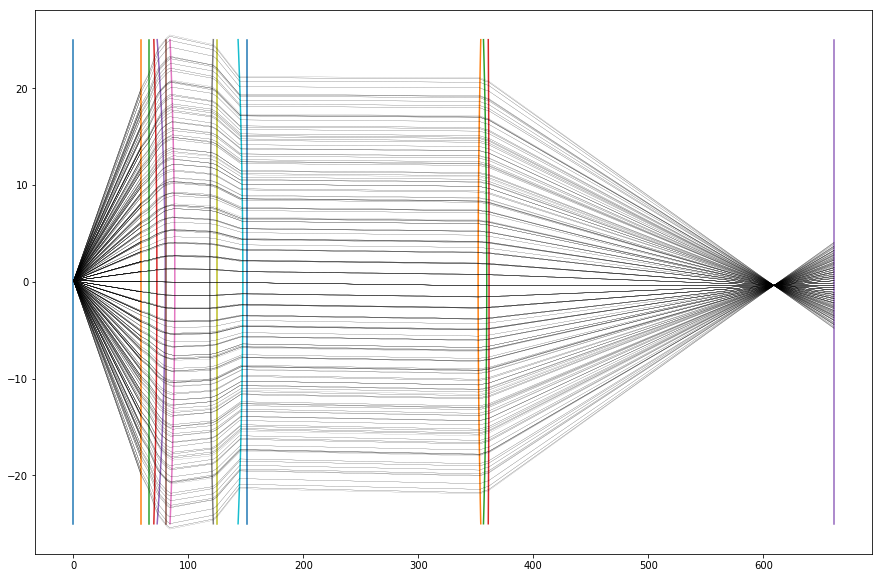

In [99]:
   
#s.start=170
#CLC2=s.circle_of_least_confusion()
#focus_pos2=CLC2[0]
#print(CLC2)
plt.figure(figsize=(15,10))

s.plot()
bb=beam_field()        
#bb.rectangular_grid(1,250,s.entrance_pupil,0.002*0)
bb.circular_pencil(10,s.entrance_pupil*2,s.surfaces[0].DISZ,np.array([[0,0.1,0.194]]))
bb.propagate(s.surfaces)
bb.plot(color='black')
#clc3=bb.circle_of_least_confusion(1000)
print(clc3)
print(s.OSC(0.01),sum(s.OSC(0.01)))

#plt.xlim(410,420)
plt.show()

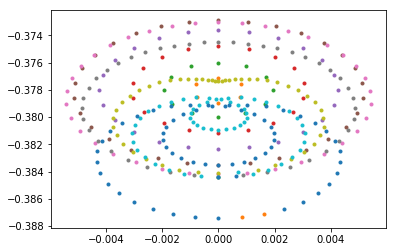

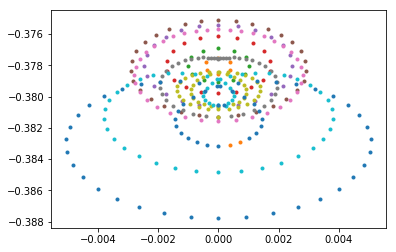

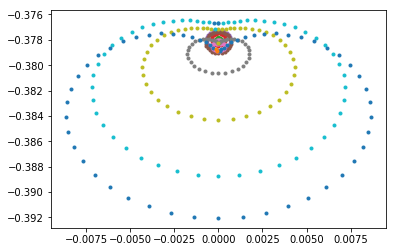

In [100]:
aa=bb.project_onto_plane(clc3[0]+0.05)
n=int(sqrt((aa.shape[0])/3-0.75)+0.5)
for i in range(int(n+1)):
    plt.plot(aa[i*(i-1)*3+1:i*(i+1)*3+1,0],aa[i*(i-1)*3+1:i*(i+1)*3+1,1],'.')
plt.show()
aa=bb.project_onto_plane(clc3[0])
n=int(sqrt((aa.shape[0])/3-0.75)+0.5)
for i in range(int(n+1)):
    plt.plot(aa[i*(i-1)*3+1:i*(i+1)*3+1,0],aa[i*(i-1)*3+1:i*(i+1)*3+1,1],'.')
plt.show()
aa=bb.project_onto_plane(clc3[0]-0.05)
n=int(sqrt((aa.shape[0])/3-0.75)+0.5)
for i in range(int(n+1)):
    plt.plot(aa[i*(i-1)*3+1:i*(i+1)*3+1,0],aa[i*(i-1)*3+1:i*(i+1)*3+1,1],'.')
plt.show()


In [78]:
from math import *
sqrt(1/4+110)-0.5

10.0

In [76]:
10*(10+1)

110

In [87]:
Airy_Radius=1.22*0.671*7/5

1.146068